In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv1D,MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])
 
df['diagnosis'].unique()

array([1, 0])

In [6]:
y=df['diagnosis']
X = df.drop(columns=['diagnosis','id','Unnamed: 32'],axis=1)

In [7]:
print(X.shape,y.shape)

(569, 30) (569,)


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [11]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)

In [12]:
X_train

array([[[-1.44075296],
        [-0.43531947],
        [-1.36208497],
        ...,
        [ 0.9320124 ],
        [ 2.09724217],
        [ 1.88645014]],

       [[ 1.97409619],
        [ 1.73302577],
        [ 2.09167167],
        ...,
        [ 2.6989469 ],
        [ 1.89116053],
        [ 2.49783848]],

       [[-1.39998202],
        [-1.24962228],
        [-1.34520926],
        ...,
        [-0.97023893],
        [ 0.59760192],
        [ 0.0578942 ]],

       ...,

       [[ 0.04880192],
        [-0.55500086],
        [-0.06512547],
        ...,
        [-1.23903365],
        [-0.70863864],
        [-1.27145475]],

       [[-0.03896885],
        [ 0.10207345],
        [-0.03137406],
        ...,
        [ 1.05001236],
        [ 0.43432185],
        [ 1.21336207]],

       [[-0.54860557],
        [ 0.31327591],
        [-0.60350155],
        ...,
        [-0.61102866],
        [-0.3345212 ],
        [-0.84628745]]])

In [13]:
epochs = 1000

model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [15]:
model.compile(optimizer=Adam(learning_rate=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/1000
15/15 [==============================] - 2s 25ms/step - loss: 1.0740 - accuracy: 0.5231 - val_loss: 0.6460 - val_accuracy: 0.7281
Epoch 2/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.8092 - accuracy: 0.6703 - val_loss: 0.6106 - val_accuracy: 0.8421
Epoch 3/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6595 - accuracy: 0.7275 - val_loss: 0.5802 - val_accuracy: 0.9211
Epoch 4/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.4712 - accuracy: 0.7934 - val_loss: 0.5513 - val_accuracy: 0.9561
Epoch 5/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.5133 - accuracy: 0.7780 - val_loss: 0.5208 - val_accuracy: 0.9561
Epoch 6/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.4703 - accuracy: 0.8110 - val_loss: 0.4904 - val_accuracy: 0.9474
Epoch 7/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3349 - accuracy: 0.8681 - val_loss: 0.4602 - val_accuracy: 0.9298
Ep

15/15 [==============================] - 0s 8ms/step - loss: 0.0557 - accuracy: 0.9846 - val_loss: 0.0740 - val_accuracy: 0.9737
Epoch 116/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0657 - accuracy: 0.9736 - val_loss: 0.0741 - val_accuracy: 0.9737
Epoch 117/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0695 - accuracy: 0.9758 - val_loss: 0.0742 - val_accuracy: 0.9737
Epoch 118/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0640 - accuracy: 0.9758 - val_loss: 0.0742 - val_accuracy: 0.9737
Epoch 119/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0553 - accuracy: 0.9846 - val_loss: 0.0740 - val_accuracy: 0.9561
Epoch 120/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0754 - accuracy: 0.9648 - val_loss: 0.0751 - val_accuracy: 0.9561
Epoch 121/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0693 - accuracy: 0.9736 - val_loss: 0.0755 - val_accuracy: 0.9561
Epoch 1

Epoch 172/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0560 - accuracy: 0.9802 - val_loss: 0.0798 - val_accuracy: 0.9737
Epoch 173/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0766 - accuracy: 0.9670 - val_loss: 0.0806 - val_accuracy: 0.9737
Epoch 174/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0499 - accuracy: 0.9868 - val_loss: 0.0788 - val_accuracy: 0.9737
Epoch 175/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0494 - accuracy: 0.9824 - val_loss: 0.0780 - val_accuracy: 0.9649
Epoch 176/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0399 - accuracy: 0.9868 - val_loss: 0.0780 - val_accuracy: 0.9649
Epoch 177/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0503 - accuracy: 0.9824 - val_loss: 0.0783 - val_accuracy: 0.9649
Epoch 178/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0554 - accuracy: 0.9846 - val_loss: 0.0791 - val_accuracy:

Epoch 229/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0573 - accuracy: 0.9758 - val_loss: 0.0835 - val_accuracy: 0.9561
Epoch 230/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0559 - accuracy: 0.9846 - val_loss: 0.0838 - val_accuracy: 0.9649
Epoch 231/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0412 - accuracy: 0.9846 - val_loss: 0.0844 - val_accuracy: 0.9649
Epoch 232/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0496 - accuracy: 0.9758 - val_loss: 0.0856 - val_accuracy: 0.9561
Epoch 233/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0327 - accuracy: 0.9890 - val_loss: 0.0854 - val_accuracy: 0.9561
Epoch 234/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0347 - accuracy: 0.9846 - val_loss: 0.0859 - val_accuracy: 0.9561
Epoch 235/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0371 - accuracy: 0.9934 - val_loss: 0.0850 - val_accuracy:

Epoch 286/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0273 - accuracy: 0.9890 - val_loss: 0.0875 - val_accuracy: 0.9649
Epoch 287/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0337 - accuracy: 0.9912 - val_loss: 0.0868 - val_accuracy: 0.9649
Epoch 288/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0431 - accuracy: 0.9824 - val_loss: 0.0873 - val_accuracy: 0.9649
Epoch 289/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0608 - accuracy: 0.9802 - val_loss: 0.0871 - val_accuracy: 0.9649
Epoch 290/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0378 - accuracy: 0.9824 - val_loss: 0.0863 - val_accuracy: 0.9649
Epoch 291/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0327 - accuracy: 0.9890 - val_loss: 0.0847 - val_accuracy: 0.9649
Epoch 292/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0327 - accuracy: 0.9912 - val_loss: 0.0838 - val_accuracy:

Epoch 343/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0194 - accuracy: 0.9934 - val_loss: 0.0882 - val_accuracy: 0.9561
Epoch 344/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0241 - accuracy: 0.9956 - val_loss: 0.0906 - val_accuracy: 0.9649
Epoch 345/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0314 - accuracy: 0.9868 - val_loss: 0.0919 - val_accuracy: 0.9649
Epoch 346/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0320 - accuracy: 0.9868 - val_loss: 0.0921 - val_accuracy: 0.9649
Epoch 347/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0395 - accuracy: 0.9868 - val_loss: 0.0922 - val_accuracy: 0.9649
Epoch 348/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0332 - accuracy: 0.9802 - val_loss: 0.0918 - val_accuracy: 0.9649
Epoch 349/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0917 - val_accuracy:

Epoch 400/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0327 - accuracy: 0.9912 - val_loss: 0.0865 - val_accuracy: 0.9649
Epoch 401/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0215 - accuracy: 0.9912 - val_loss: 0.0870 - val_accuracy: 0.9561
Epoch 402/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0505 - accuracy: 0.9758 - val_loss: 0.0875 - val_accuracy: 0.9649
Epoch 403/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0246 - accuracy: 0.9868 - val_loss: 0.0871 - val_accuracy: 0.9649
Epoch 404/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0281 - accuracy: 0.9846 - val_loss: 0.0866 - val_accuracy: 0.9649
Epoch 405/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0262 - accuracy: 0.9890 - val_loss: 0.0860 - val_accuracy: 0.9649
Epoch 406/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0343 - accuracy: 0.9934 - val_loss: 0.0861 - val_accuracy:

Epoch 457/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0480 - accuracy: 0.9802 - val_loss: 0.0902 - val_accuracy: 0.9561
Epoch 458/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0303 - accuracy: 0.9868 - val_loss: 0.0899 - val_accuracy: 0.9561
Epoch 459/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0203 - accuracy: 0.9956 - val_loss: 0.0908 - val_accuracy: 0.9561
Epoch 460/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0344 - accuracy: 0.9912 - val_loss: 0.0924 - val_accuracy: 0.9561
Epoch 461/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0226 - accuracy: 0.9912 - val_loss: 0.0921 - val_accuracy: 0.9561
Epoch 462/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0380 - accuracy: 0.9890 - val_loss: 0.0914 - val_accuracy: 0.9649
Epoch 463/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.9912 - val_loss: 0.0914 - val_accuracy:

Epoch 514/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0317 - accuracy: 0.9824 - val_loss: 0.0957 - val_accuracy: 0.9649
Epoch 515/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0128 - accuracy: 0.9978 - val_loss: 0.0965 - val_accuracy: 0.9649
Epoch 516/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0170 - accuracy: 0.9978 - val_loss: 0.0963 - val_accuracy: 0.9649
Epoch 517/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0171 - accuracy: 0.9956 - val_loss: 0.0953 - val_accuracy: 0.9649
Epoch 518/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0258 - accuracy: 0.9868 - val_loss: 0.0942 - val_accuracy: 0.9649
Epoch 519/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0208 - accuracy: 0.9956 - val_loss: 0.0940 - val_accuracy: 0.9649
Epoch 520/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0386 - accuracy: 0.9912 - val_loss: 0.0944 - val_accuracy:

Epoch 571/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0994 - val_accuracy: 0.9561
Epoch 572/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0138 - accuracy: 0.9934 - val_loss: 0.0999 - val_accuracy: 0.9561
Epoch 573/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0471 - accuracy: 0.9824 - val_loss: 0.1006 - val_accuracy: 0.9561
Epoch 574/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0135 - accuracy: 0.9978 - val_loss: 0.1005 - val_accuracy: 0.9649
Epoch 575/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0081 - accuracy: 0.9978 - val_loss: 0.1004 - val_accuracy: 0.9649
Epoch 576/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0219 - accuracy: 0.9912 - val_loss: 0.1002 - val_accuracy: 0.9649
Epoch 577/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0187 - accuracy: 0.9956 - val_loss: 0.1010 - val_accuracy:

Epoch 628/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0158 - accuracy: 0.9956 - val_loss: 0.1018 - val_accuracy: 0.9649
Epoch 629/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0127 - accuracy: 0.9978 - val_loss: 0.1019 - val_accuracy: 0.9649
Epoch 630/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0124 - accuracy: 0.9978 - val_loss: 0.1012 - val_accuracy: 0.9649
Epoch 631/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 0.9956 - val_loss: 0.1018 - val_accuracy: 0.9649
Epoch 632/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.1018 - val_accuracy: 0.9649
Epoch 633/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0189 - accuracy: 0.9956 - val_loss: 0.1022 - val_accuracy: 0.9649
Epoch 634/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0107 - accuracy: 0.9956 - val_loss: 0.1031 - val_accuracy:

Epoch 685/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0105 - accuracy: 0.9978 - val_loss: 0.1059 - val_accuracy: 0.9737
Epoch 686/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0147 - accuracy: 0.9912 - val_loss: 0.1048 - val_accuracy: 0.9737
Epoch 687/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0171 - accuracy: 0.9934 - val_loss: 0.1043 - val_accuracy: 0.9737
Epoch 688/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0114 - accuracy: 0.9934 - val_loss: 0.1009 - val_accuracy: 0.9737
Epoch 689/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0998 - val_accuracy: 0.9737
Epoch 690/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0996 - val_accuracy: 0.9737
Epoch 691/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0171 - accuracy: 0.9956 - val_loss: 0.0999 - val_accuracy

Epoch 742/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0141 - accuracy: 0.9956 - val_loss: 0.0971 - val_accuracy: 0.9737
Epoch 743/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0216 - accuracy: 0.9912 - val_loss: 0.0968 - val_accuracy: 0.9737
Epoch 744/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.9934 - val_loss: 0.0971 - val_accuracy: 0.9737
Epoch 745/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0217 - accuracy: 0.9912 - val_loss: 0.0966 - val_accuracy: 0.9737
Epoch 746/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.9956 - val_loss: 0.0968 - val_accuracy: 0.9737
Epoch 747/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0969 - val_accuracy: 0.9737
Epoch 748/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.9956 - val_loss: 0.0972 - val_accuracy:

Epoch 799/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0250 - accuracy: 0.9890 - val_loss: 0.0943 - val_accuracy: 0.9737
Epoch 800/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 0.9737
Epoch 801/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0238 - accuracy: 0.9934 - val_loss: 0.0936 - val_accuracy: 0.9737
Epoch 802/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0121 - accuracy: 0.9934 - val_loss: 0.0933 - val_accuracy: 0.9737
Epoch 803/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0184 - accuracy: 0.9956 - val_loss: 0.0942 - val_accuracy: 0.9737
Epoch 804/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0121 - accuracy: 0.9934 - val_loss: 0.0945 - val_accuracy: 0.9737
Epoch 805/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0217 - accuracy: 0.9956 - val_loss: 0.0960 - val_accuracy:

Epoch 856/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0105 - accuracy: 0.9956 - val_loss: 0.1010 - val_accuracy: 0.9737
Epoch 857/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.1006 - val_accuracy: 0.9737
Epoch 858/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0128 - accuracy: 0.9934 - val_loss: 0.1008 - val_accuracy: 0.9737
Epoch 859/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0358 - accuracy: 0.9934 - val_loss: 0.1011 - val_accuracy: 0.9737
Epoch 860/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.1033 - val_accuracy: 0.9737
Epoch 861/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 0.9934 - val_loss: 0.1047 - val_accuracy: 0.9737
Epoch 862/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0108 - accuracy: 0.9956 - val_loss: 0.1089 - val_accuracy:

Epoch 913/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.1024 - val_accuracy: 0.9737
Epoch 914/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.1032 - val_accuracy: 0.9737
Epoch 915/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0104 - accuracy: 0.9978 - val_loss: 0.1034 - val_accuracy: 0.9737
Epoch 916/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0087 - accuracy: 0.9956 - val_loss: 0.1029 - val_accuracy: 0.9737
Epoch 917/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0121 - accuracy: 0.9978 - val_loss: 0.1018 - val_accuracy: 0.9737
Epoch 918/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0095 - accuracy: 0.9956 - val_loss: 0.1017 - val_accuracy: 0.9737
Epoch 919/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.1005 - val_accuracy:

Epoch 970/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0185 - accuracy: 0.9934 - val_loss: 0.1087 - val_accuracy: 0.9737
Epoch 971/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0172 - accuracy: 0.9934 - val_loss: 0.1090 - val_accuracy: 0.9737
Epoch 972/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.1107 - val_accuracy: 0.9737
Epoch 973/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.1109 - val_accuracy: 0.9737
Epoch 974/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0120 - accuracy: 0.9956 - val_loss: 0.1081 - val_accuracy: 0.9737
Epoch 975/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0084 - accuracy: 0.9956 - val_loss: 0.1089 - val_accuracy: 0.9737
Epoch 976/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.9956 - val_loss: 0.1076 - val_accuracy:

In [17]:
def plot_learning(history,epoch):
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

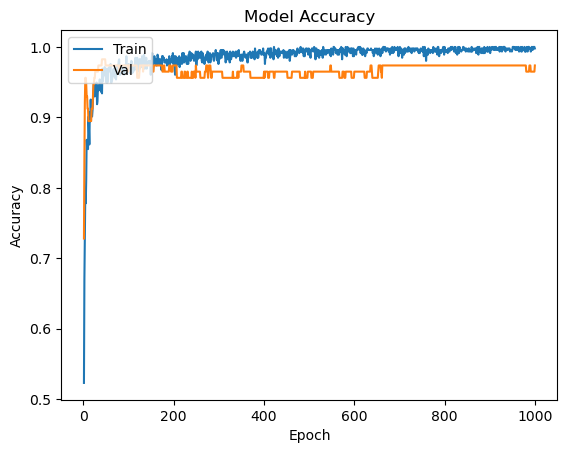

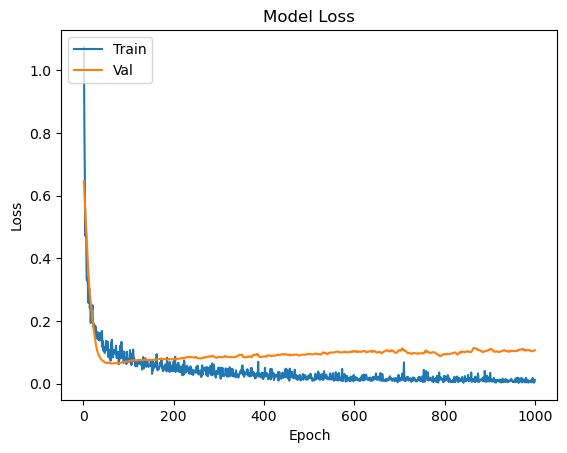

In [18]:
plot_learning(history,epochs)

In [19]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 3ms/step


In [20]:
y_pred

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
    

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report,roc_auc_score,roc_curve
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
# Get the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

# calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

print("AUC Score: {:.2f}".format(auc_score))

0.9736842105263158
0.9761904761904762
0.9534883720930233
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC Score: 0.97


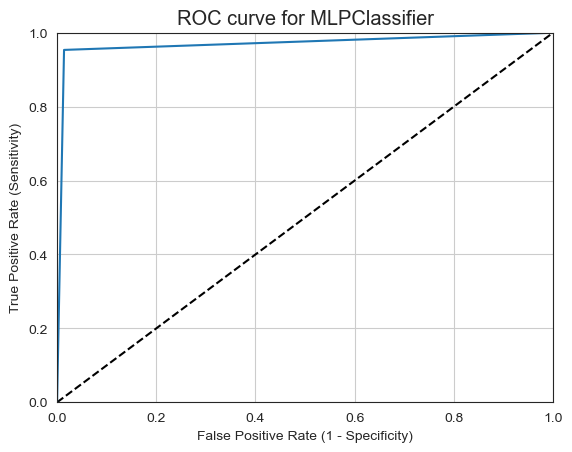

In [34]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for MLPClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

<AxesSubplot:>

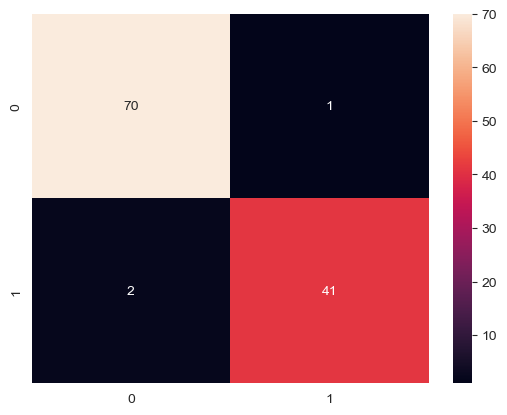

In [31]:
import seaborn as sns
sns.set_style("white")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
#Code gotten from Sayan Saha,s Breast Cancer using CNN 96.49% Test Accuracy.https://www.kaggle.com/code/sayansh001/breast-cancer-using-cnn-96-49-test-accuracy